## SUICIDE ANALYSIS AND PREDICTION

This compiled dataset pulled from four other datasets linked by time and place, and was built to find signals correlated to increased suicide rates among different cohorts globally, across the socio-economic spectrum.

References United Nations Development Program. (2018). Human development index (HDI). Retrieved from http://hdr.undp.org/en/indicators/137506

World Bank. (2018). World development indicators: GDP (current US$) by country:1985 to 2016. Retrieved from http://databank.worldbank.org/data/source/world-development-indicators#

[Szamil]. (2017). Suicide in the Twenty-First Century [dataset]. Retrieved from https://www.kaggle.com/szamil/suicide-in-the-twenty-first-century/notebook

World Health Organization. (2018). Suicide prevention. Retrieved from http://www.who.int/mental_health/suicide-prevention/en/

Inspiration Suicide Prevention.

### OBJECTIVES
    
#### DATA ANALYSIS AND VISUALIZATION:
    
    - Suicides in the world in 2015

    - Spain suicides per generation 

    - Relation between suicides per 100K and the gdppercapita of countries in the 2015

    - Suicides in the world in the 2015 group by age

    - Time Series of Spain: difference between male and female

    - Relation between suicides per 100K and the HDI of countries in the 2015
    
    - CLUSTERING and understanding
    
#### TIME SERIES PREDICTION (over male suicides)

    - Data Transformation to achieve Stationarity
    
    - Log Scale Transformation
    
    - Exponential Decay Transformation
    
    - Time Shift Transformation
    
    - Plotting ACF & PACF
    
    - Building Models
    
    - Prediction & Reverse transformations

In [1]:
# import necessary package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
path = os.getcwd()
path

'C:\\Users\\igart\\Desktop\\PROYECTO 2\\PROYECTO SUICIDIOS'

In [3]:
print(os.listdir(path))

['.ipynb_checkpoints', 'first_figure.html', 'graph.png', 'master.csv', 'mi_grafica.html', 'SUICIDE ANALYTICS.ipynb', 'yourfile.png', 'your_file_name.png']


In [4]:
df = pd.read_csv("master.csv", index_col='country')

In [5]:
df.head()

year     sex          age  suicides_no  population  \
country                                                       
Albania  1987    male  15-24 years           21      312900   
Albania  1987    male  35-54 years           16      308000   
Albania  1987  female  15-24 years           14      289700   
Albania  1987    male    75+ years            1       21800   
Albania  1987    male  25-34 years            9      274300   

         suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
country                                                                    
Albania               6.71  Albania1987           NaN      2,156,624,900   
Albania               5.19  Albania1987           NaN      2,156,624,900   
Albania               4.83  Albania1987           NaN      2,156,624,900   
Albania               4.59  Albania1987           NaN      2,156,624,900   
Albania               3.28  Albania1987           NaN      2,156,624,900   

         gdp_per_capita ($)       generation  
country                                       
Albania                 796     Generation X  
Albania                 796           Silent  
Albania                 796     Generation X  
Albania                 796  G.I. Generation  
Albania                 796          Boomers

In [6]:
#so,change the names of the column. Because there may be problems for future analysis.
df.rename(columns={'country':'Country','year':'Year','sex':'Gender','age':'Age','suicides_no':'SuicidesNo','population':'Population','suicides/100k pop':'Suicides100kPop','country-year':'CountryYear','HDI for year':'HDIForYear',' gdp_for_year ($) ':'GdpForYearMoney','gdp_per_capita ($)':'GdpPerCapitalMoney','generation':'Generation'},
          inplace=True)
df.index.name='Country'

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27820 entries, Albania to Uzbekistan
Data columns (total 11 columns):
Year                  27820 non-null int64
Gender                27820 non-null object
Age                   27820 non-null object
SuicidesNo            27820 non-null int64
Population            27820 non-null int64
Suicides100kPop       27820 non-null float64
CountryYear           27820 non-null object
HDIForYear            8364 non-null float64
GdpForYearMoney       27820 non-null object
GdpPerCapitalMoney    27820 non-null int64
Generation            27820 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 2.5+ MB


In [8]:
df.drop(columns='CountryYear',inplace=True)

In [9]:
# I make a helpful function to understand the features
def fastview(serie, df=df):
    
        isna = "the feature has %d nan values" % (serie.isna().sum())
        isnull = "the feature has %d null values" % (serie.isnull().sum())
        types =  "the feature has the type of %s" % (serie.dtype)
        count =  serie.value_counts().head(10)
        
        if serie.dtype=="object":
            uniques = "the feature has %d unique values and the dataframe has %s rows" % (serie.unique().size, len(df))
            print(uniques)
            if serie.unique().size < 25:
                print(serie.value_counts().plot(kind="pie"))
        
        return isna, isnull, types,  count                           

In [10]:
fastview(df["HDIForYear"])

('the feature has 19456 nan values',
 'the feature has 19456 null values',
 'the feature has the type of float64',
 0.888    84
 0.772    84
 0.713    84
 0.830    72
 0.793    72
 0.909    72
 0.756    72
 0.827    72
 0.761    72
 0.780    60
 Name: HDIForYear, dtype: int64)

In [11]:
countries = df.index.unique()

In [12]:
df[ df['HDIForYear'].isna()]# we have to fill this nan values with the mean group by country

Year  Gender          Age  SuicidesNo  Population  \
Country                                                         
Albania     1987    male  15-24 years          21      312900   
Albania     1987    male  35-54 years          16      308000   
Albania     1987  female  15-24 years          14      289700   
Albania     1987    male    75+ years           1       21800   
Albania     1987    male  25-34 years           9      274300   
Albania     1987  female    75+ years           1       35600   
Albania     1987  female  35-54 years           6      278800   
Albania     1987  female  25-34 years           4      257200   
Albania     1987    male  55-74 years           1      137500   
Albania     1987  female   5-14 years           0      311000   
Albania     1987  female  55-74 years           0      144600   
Albania     1987    male   5-14 years           0      338200   
Albania     1988  female    75+ years           2       36400   
Albania     1988    male  15-24 years          17      319200   
Albania     1988    male    75+ years           1       22300   
Albania     1988    male  35-54 years          14      314100   
Albania     1988    male  55-74 years           4      140200   
Albania     1988  female  15-24 years           8      295600   
Albania     1988  female  55-74 years           3      147500   
Albania     1988  female  25-34 years           5      262400   
Albania     1988    male  25-34 years           5      279900   
Albania     1988  female  35-54 years           4      284500   
Albania     1988  female   5-14 years           0      317200   
Albania     1988    male   5-14 years           0      345000   
Albania     1989    male    75+ years           2       22500   
Albania     1989    male  25-34 years          18      283600   
Albania     1989    male  35-54 years          15      318400   
Albania     1989    male  55-74 years           6      142100   
Albania     1989    male  15-24 years          12      323500   
Albania     1989  female  35-54 years           7      288600   
...          ...     ...          ...         ...         ...   
Uzbekistan  2003  female  25-34 years          99     1962726   
Uzbekistan  2003  female    75+ years          10      237495   
Uzbekistan  2003  female  55-74 years          31      877339   
Uzbekistan  2003  female  35-54 years          77     2675118   
Uzbekistan  2003    male   5-14 years          45     3219722   
Uzbekistan  2003  female   5-14 years          11     3085543   
Uzbekistan  2004    male  35-54 years         350     2639741   
Uzbekistan  2004    male  25-34 years         234     2012929   
Uzbekistan  2004    male  55-74 years          84      792630   
Uzbekistan  2004    male  15-24 years         237     2836903   
Uzbekistan  2004    male    75+ years           9      145877   
Uzbekistan  2004  female  15-24 years         137     2782222   
Uzbekistan  2004  female    75+ years          10      247300   
Uzbekistan  2004  female  25-34 years          69     2003119   
Uzbekistan  2004  female  35-54 years          70     2761019   
Uzbekistan  2004  female  55-74 years          18      880059   
Uzbekistan  2004    male   5-14 years          29     3167129   
Uzbekistan  2004  female   5-14 years           4     3031913   
Uzbekistan  2009    male  35-54 years         404     3072025   
Uzbekistan  2009    male  25-34 years         252     2295850   
Uzbekistan  2009    male  55-74 years          81      985960   
Uzbekistan  2009    male  15-24 years         242     3176656   
Uzbekistan  2009  female  15-24 years         186     3079271   
Uzbekistan  2009  female  25-34 years          85     2313972   
Uzbekistan  2009    male    75+ years           7      192006   
Uzbekistan  2009  female    75+ years           7      318983   
Uzbekistan  2009  female  35-54 years          65     3263931   
Uzbekistan  2009  female  55-74 years          15     1105076   
Uzbekistan  2009    male   5-14 years          

In [13]:
df.HDIForYear = df.groupby('Country')['HDIForYear'].apply(lambda x: x.fillna(x.mean())) #fiilling missing data

In [14]:
df [df['HDIForYear'].isna()] #these countries must to be deleted. We can prescind of them because of the missing data

Year  Gender          Age  SuicidesNo  Population  \
Country                                                         
Aruba       1995    male    75+ years           2         889   
Aruba       1995    male  25-34 years           4        7520   
Aruba       1995    male  55-74 years           1        4558   
Aruba       1995    male  35-54 years           1       11895   
Aruba       1995  female  15-24 years           0        5138   
Aruba       1995  female  25-34 years           0        7439   
Aruba       1995  female  35-54 years           0       12391   
Aruba       1995  female   5-14 years           0        5906   
Aruba       1995  female  55-74 years           0        5160   
Aruba       1995  female    75+ years           0        1295   
Aruba       1995    male  15-24 years           0        5227   
Aruba       1995    male   5-14 years           0        6163   
Aruba       1999    male  25-34 years           4        7031   
Aruba       1999    male  15-24 years           2        5428   
Aruba       1999    male  35-54 years           3       13807   
Aruba       1999  female  15-24 years           0        5563   
Aruba       1999  female  25-34 years           0        7411   
Aruba       1999  female  35-54 years           0       14951   
Aruba       1999  female   5-14 years           0        6784   
Aruba       1999  female  55-74 years           0        6192   
Aruba       1999  female    75+ years           0        1475   
Aruba       1999    male   5-14 years           0        6923   
Aruba       1999    male  55-74 years           0        5395   
Aruba       1999    male    75+ years           0         974   
Aruba       2000  female    75+ years           2        1499   
Aruba       2000    male    75+ years           1         989   
Aruba       2000    male  25-34 years           3        6828   
Aruba       2000    male  35-54 years           2       14228   
Aruba       2000  female  35-54 years           2       15624   
Aruba       2000  female  15-24 years           0        5675   
...          ...     ...          ...         ...         ...   
San Marino  1999  female  55-74 years           0        2738   
San Marino  1999  female    75+ years           0        1147   
San Marino  1999    male  15-24 years           0        1539   
San Marino  1999    male  25-34 years           0        2138   
San Marino  1999    male   5-14 years           0        1309   
San Marino  1999    male    75+ years           0         721   
San Marino  2000    male  25-34 years           1        2116   
San Marino  2000  female  15-24 years           0        1435   
San Marino  2000  female  25-34 years           0        2238   
San Marino  2000  female  35-54 years           0        4192   
San Marino  2000  female   5-14 years           0        1225   
San Marino  2000  female  55-74 years           0        2776   
San Marino  2000  female    75+ years           0        1194   
San Marino  2000    male  15-24 years           0        1412   
San Marino  2000    male  35-54 years           0        4117   
San Marino  2000    male   5-14 years           0        1321   
San Marino  2000    male  55-74 years           0        2590   
San Marino  2000    male    75+ years           0         753   
San Marino  2005    male  55-74 years           1        2940   
San Marino  2005  female  15-24 years           0        1325   
San Marino  2005  female  25-34 years           0        2339   
San Marino  2005  female  35-54 years           0        4856   
San Marino  2005  female   5-14 years           0        1414   
San Marino  2005  female  55-74 years           0        3105   
San Marino  2005  female    75+ years           0        1423   
San Marino  2005    male  15-24 years           0        1440   
San Marino  2005    male  25-34 years           0        2176   
San Marino  2005    male  35-54 years           0        4793   
San Marino  2005    male   5-14 years          

In [15]:
df.dropna(inplace=True)

In [16]:
df.isna().any()

Year                  False
Gender                False
Age                   False
SuicidesNo            False
Population            False
Suicides100kPop       False
HDIForYear            False
GdpForYearMoney       False
GdpPerCapitalMoney    False
Generation            False
dtype: bool

#### DATA ANALYSIS AND VISUALIZATION

In [17]:
import plotly.graph_objects as go
import plotly.express as px

In [18]:
#Suicides in the world in the 2015
df.loc[df.Year==2015].loc[:,'SuicidesNo'].sum()

164472

In [19]:
# !pip install worldcloud
# to plot a word cloud graphic of the acumulate suicides per country in all the time serie
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [20]:
#?WordCloud

In [21]:
df.head()

Year  Gender          Age  SuicidesNo  Population  Suicides100kPop  \
Country                                                                       
Albania  1987    male  15-24 years          21      312900             6.71   
Albania  1987    male  35-54 years          16      308000             5.19   
Albania  1987  female  15-24 years          14      289700             4.83   
Albania  1987    male    75+ years           1       21800             4.59   
Albania  1987    male  25-34 years           9      274300             3.28   

         HDIForYear GdpForYearMoney  GdpPerCapitalMoney       Generation  
Country                                                                   
Albania       0.673   2,156,624,900                 796     Generation X  
Albania       0.673   2,156,624,900                 796           Silent  
Albania       0.673   2,156,624,900                 796     Generation X  
Albania       0.673   2,156,624,900                 796  G.I. Generation  
Albania       0.673   2,156,624,900                 796          Boomers

In [22]:
df_word = df.reset_index()
df_word = df_word.groupby('Country')['SuicidesNo'].mean()
df_word = df_word.reset_index()
df_word_dict = dict(zip(df_word['Country'],df_word['SuicidesNo']))

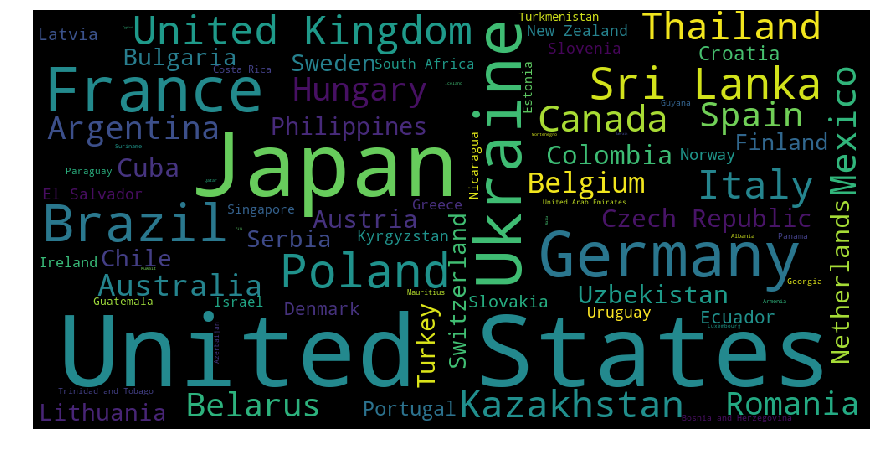

<Figure size 432x288 with 0 Axes>

In [23]:
from collections import Counter
Word_could_dict=Counter(df_word_dict)
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(Word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.savefig('yourfile.png', bbox_inches='tight')

In [24]:
#Spain suicides per generation 

In [25]:
df_spain_generation = (df.loc['Spain']).groupby(by=['Generation'])['SuicidesNo'].sum()

In [26]:
fig = go.Figure(data=[go.Bar(x=df_spain_generation.index,y=df_spain_generation.values)],
      layout_title_text="Spanish suicides per generations in the last 25 years")
#fig.write_html('first_figure.html', auto_open=True)
fig.show()

In [27]:
# Relation between suicides per 100K and the gdppercapita of countries in the 2015

In [28]:
df_relation_gdp = (df.loc[df.Year==2015]).groupby(
                                          by=['Country'])['Suicides100kPop','GdpPerCapitalMoney'].mean()     

In [29]:
df_relation_gdp.head()

Suicides100kPop  GdpPerCapitalMoney
Country                                                 
Antigua and Barbuda         1.301667               14853
Argentina                   9.344167               14981
Armenia                     3.773333                3775
Australia                  12.848333               60656
Austria                    16.218333               46484

In [30]:
fig = px.scatter(df_relation_gdp, x='Suicides100kPop', y='GdpPerCapitalMoney',
                 color=df_relation_gdp.index)

annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Relation between suicides per 100K and the gdppercapita of countries in the 2015',
                              font=dict(family='Arial',
                                        size=18,
                                        color='rgb(37,37,37)'),
                              showarrow=False))
fig.update_layout(annotations=annotations)
fig.show()

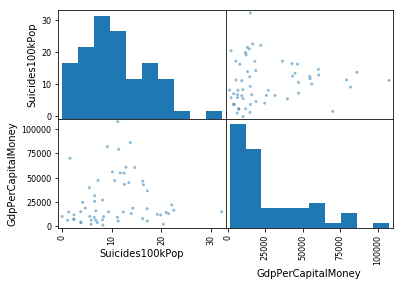

In [31]:
scatter_matrix(df_relation_gdp)
plt.show()

In [32]:
# Suicides in the world in the 2015 group by age

In [33]:
df_age = (df.loc[df.Year==2015]).groupby('Age')['SuicidesNo'].sum()
df_age

Age
15-24 years    18847
25-34 years    24803
35-54 years    56878
5-14 years      1513
55-74 years    43894
75+ years      18537
Name: SuicidesNo, dtype: int64

In [34]:
df_age.values

array([18847, 24803, 56878,  1513, 43894, 18537], dtype=int64)

In [35]:
fig = px.bar(df_age, x=df_age.index, y=df_age.values)

annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Suicides in the world in the 2015 group by age',
                              font=dict(family='Arial',
                                        size=18,
                                        color='rgb(37,37,37)'),
                              showarrow=False))
fig.update_layout(annotations=annotations)
fig.show()

In [36]:
#Time Serie of Spain: difference between male and female

In [37]:
df_spain_gender = (df.loc['Spain']).pivot_table(values='SuicidesNo',
                                                index = 'Year', 
                                                columns='Gender', 
                                                aggfunc='sum')
df_spain_gender.head(5)

#other
#df_spain_gender = (df.loc['Spain']).groupby(['Year','Gender'])['SuicidesNo'].sum()
#df_spain_gender.unstack('Gender')

Gender  female  male
Year                
1985       685  1829
1986       723  2032
1987       787  2017
1988       810  2150
1989       774  2213

In [38]:
fig = go.Figure(layout_title_text="Time Serie of Spain: difference between male and female")

fig.add_trace(go.Scatter(x=df_spain_gender.index, y=df_spain_gender.male,
                    mode='lines',
                    name='male'))
fig.add_trace(go.Scatter(x=df_spain_gender.index, y=df_spain_gender.female,
                    mode='lines',
                    name='female'))

fig.show()

In [39]:
# Relation between suicides per 100K and the HDI of countries in the 2015

In [40]:
df_relation_hdi = (df.loc[df.Year==2015]).groupby(by=['Country'])['Suicides100kPop','HDIForYear'].mean()     

In [41]:
fig = px.scatter(df_relation_hdi, x='Suicides100kPop', y='HDIForYear',
                 color=df_relation_hdi.index)

annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Relation between suicides per 100K and the HDI of countries in the 2015',
                              font=dict(family='Arial',
                                        size=18,
                                        color='rgb(37,37,37)'),
                              showarrow=False))
fig.update_layout(annotations=annotations)
fig.show()

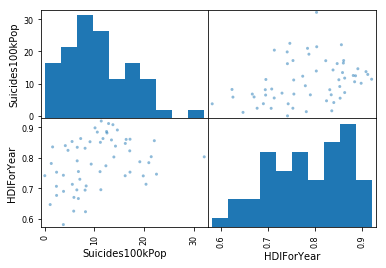

In [42]:
scatter_matrix(df_relation_hdi)
plt.show()

In [43]:
#! pip install cufflinks plotly
#Setting up plotly
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot, plot_mpl
#import plotly.offline as py
#init_notebook_mode(connected=True)

## Clustering and understanding 

In [44]:
from sklearn.cluster import k_means
from sklearn.preprocessing import MinMaxScaler

In [45]:
numeric_features = df.select_dtypes(include=['int64', 'float64','int32']).columns
df_pre_group = df[numeric_features[[1,2,4,5]]] # without "Year" and "suicides/100k pop" because 
#we dond´t get information about that

In [46]:
X = df_pre_group.groupby(df_pre_group.index).mean()

In [47]:
X.head(2)

SuicidesNo     Population  HDIForYear  GdpPerCapitalMoney
Country                                                                       
Albania                7.462121  236081.314394    0.673000         1859.045455
Antigua and Barbuda    0.033951    6142.679012    0.781667        10448.185185

In [48]:
min_max_scaler = MinMaxScaler() 
X_normalize = min_max_scaler.fit_transform(X)
X_normalize = pd.DataFrame(X_normalize)
X_normalize.rename(columns={0:"SuicidesNo",1:"Population",2:"HDIForYear",3:"GdpPerCapitalMoney"},
                   inplace=True)
X_normalize.set_index(X.index,inplace=True)

In [49]:
X_normalize

SuicidesNo  Population  HDIForYear  \
Country                                                            
Albania                         0.002672    0.010623    0.270588   
Antigua and Barbuda             0.000000    0.000000    0.590196   
Argentina                       0.079503    0.128382    0.584118   
Armenia                         0.002288    0.011708    0.320956   
Australia                       0.070054    0.069323    0.975735   
Austria                         0.047147    0.029209    0.783824   
Azerbaijan                      0.003091    0.026616    0.127941   
Bahamas                         0.000109    0.000814    0.584804   
Bahrain                         0.000649    0.002788    0.657721   
Barbados                        0.000200    0.000673    0.516340   
Belarus                         0.085493    0.035902    0.559412   
Belgium                         0.060685    0.037385    0.822647   
Belize                          0.000360    0.000581    0.336601   
Bosnia and Herzegovina          0.004755    0.013822    0.433824   
Brazil                          0.219149    0.602827    0.335000   
Bulgaria                        0.036352    0.029483    0.475294   
Canada                          0.111186    0.109385    0.882680   
Chile                           0.039538    0.052826    0.567647   
Colombia                        0.051322    0.137319    0.262647   
Costa Rica                      0.006775    0.012829    0.403235   
Croatia                         0.025294    0.015892    0.606618   
Cuba                            0.051727    0.040109    0.471691   
Cyprus                          0.000821    0.002729    0.762605   
Czech Republic                  0.048799    0.037611    0.757843   
Denmark                         0.020834    0.019349    0.934191   
Ecuador                         0.019968    0.042481    0.332941   
El Salvador                     0.014582    0.019718    0.131699   
Estonia                         0.010030    0.004683    0.712132   
Fiji                            0.000816    0.002582    0.385294   
Finland                         0.034804    0.018559    0.817320   
...                                  ...         ...         ...   
Panama                          0.004165    0.010537    0.476471   
Paraguay                        0.005299    0.017490    0.167647   
Philippines                     0.042620    0.273091    0.183333   
Poland                          0.173748    0.138669    0.652941   
Portugal                        0.026705    0.036971    0.597059   
Qatar                           0.001148    0.005393    0.750000   
Romania                         0.078379    0.079263    0.511111   
Saint Lucia                     0.000234    0.000254    0.401261   
Saint Vincent and Grenadines    0.000136    0.000092    0.369748   
Serbia                          0.040260    0.026697    0.506723   
Seychelles                      0.000151    0.000014    0.512255   
Singapore                       0.009745    0.011421    0.800000   
Slovakia                        0.018299    0.019288    0.666387   
Slovenia                        0.015142    0.007099    0.810294   
South Africa                    0.010962    0.167798    0.193277   
Spain                           0.096895    0.152188    0.737353   
Sri Lanka                       0.151638    0.063602    0.167647   
Suriname                        0.002307    0.001317    0.372549   
Sweden                          0.037969    0.032405    0.899020   
Switzerland                     0.037416    0.027216    0.964706   
Thailand                        0.119167    0.218937    0.251471   
Trinidad and Tobago             0.004473    0.004171    0.408403   
Turkey                          0.043378    0.265175    0.505882   
Turkmenistan                    0.008903    0.015060    0.281765   
Ukraine                         0.342570    0.176610    0.389706   
United Arab Emirates            0.003096    0.023139    0.717647   
United Kingdom    

In [50]:
k = 3
cluster = k_means(X,k, init ='k-means++')
cluster

(array([[5.13835836e+02, 4.91402101e+06, 7.67388360e-01, 1.56098667e+04],
        [6.22017152e+01, 4.59863851e+05, 7.67084431e-01, 1.61293840e+04],
        [1.69438978e+03, 1.73523128e+07, 7.93250000e-01, 2.26805484e+04]]),
 array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 2,
        1, 1]),
 106873091356212.75)

In [51]:
centroids = cluster[0]
centroids

array([[5.13835836e+02, 4.91402101e+06, 7.67388360e-01, 1.56098667e+04],
       [6.22017152e+01, 4.59863851e+05, 7.67084431e-01, 1.61293840e+04],
       [1.69438978e+03, 1.73523128e+07, 7.93250000e-01, 2.26805484e+04]])

In [52]:
# Graphic representation with the clusters by color
fig = px.scatter(X_normalize, x=X_normalize['SuicidesNo'].values, y=X_normalize['GdpPerCapitalMoney'].values,
                 color=cluster[1], size=X_normalize['Population'].values, hover_name = X_normalize.index)

annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Clusters by relation between suicides and GdpPerCapitalMoney',
                              font=dict(family='Arial',
                                        size=18,
                                        color='rgb(37,37,37)'),
                              showarrow=False))
fig.update_layout(annotations=annotations)
fig.show()

### TIME SERIES PREDICTION

#### Components of Time Series

Trend - Upward & downward movement of the data with time over a large period of time. Eq: Appreciation of Dollar vs rupee

Seasonality - seasonal variances. Eq: Ice cream sales increases in Summer only

Noise or Irregularity - Spikes & troughs at random intervals

Cyclicity - behavior that repeats itself after large interval of time, like months, years etc

In [53]:
df_spain_gender.head()

Gender  female  male
Year                
1985       685  1829
1986       723  2032
1987       787  2017
1988       810  2150
1989       774  2213

In [54]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

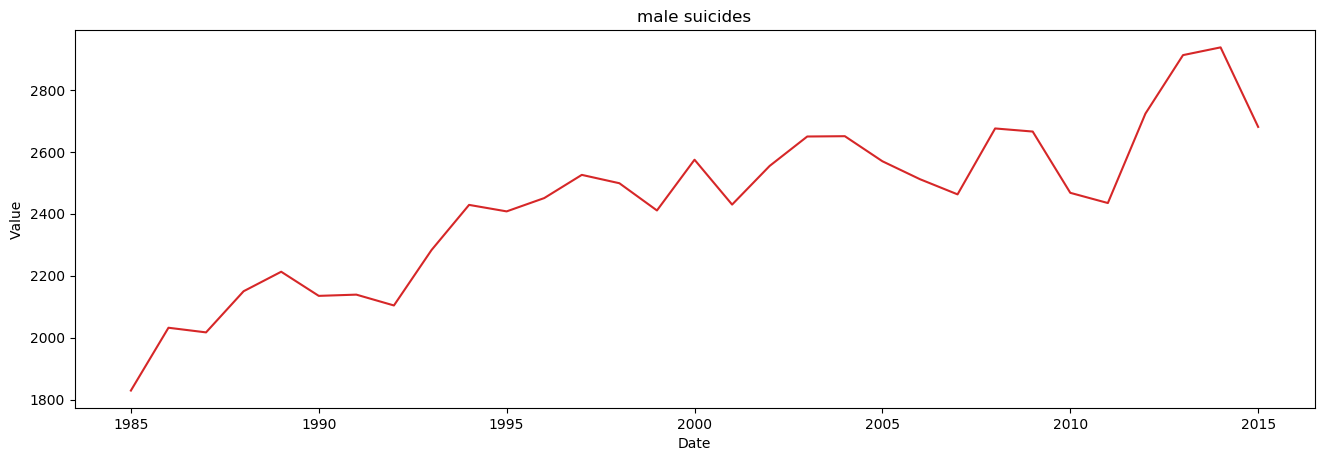

In [55]:
plot_df(df_spain_gender, x=df_spain_gender.index, y=df_spain_gender.male, title='male suicides')

In [56]:
df_male = df_spain_gender['male']
df_male.index = pd.to_datetime(df_male.index, format='%Y')

In [57]:
df_male.shape

(31,)

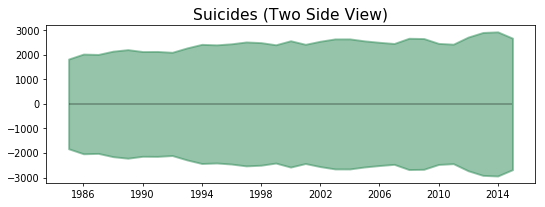

In [58]:
# Plot
x = df_male.index.values
y1 = df_male.values

fig, ax = plt.subplots(1, 1, figsize=(9,3), dpi= 70)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.title('Suicides (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df_male.index.values), xmax=np.max(df_male.index.values), linewidth=.5)
plt.show()

In [59]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

### Stationarity

Before applying any statistical model on a Time Series, the series has to be stationary, which means that, over different time periods,

- It should have constant mean.
- It should have constant variance or standard deviation.
- Auto-covariance should not depend on time.

Tests to check if a series is stationary or not

- There are 2 ways to check for Stationarity of a TS:

- Rolling Statistics - Plot the moving avg or moving standard deviation to see if it varies with time. Its a visual technique.

- ADCF Test - Augmented Dickey–Fuller test is used to gives us various values that can help in identifying stationarity. 

The Null hypothesis says that a TS is non-stationary. It comprises of a Test Statistics & some critical values for some confidence levels. If the Test statistics is less than the critical values, we can reject the null hypothesis & say that the series is stationary. THE ADCF test also gives us a p-value. Acc to the null hypothesis, lower values of p is better.

For a Time series to be stationary, its ADCF test should have:

p-value to be low (according to the null hypothesis)
The critical values at 1%,5%,10% confidence intervals should be as close as possible to the Test Statistics
From the above ADCF test result, we see that p-value(at max can be 1.0) is very large. Also critical values are no where close to the Test Statistics. Hence, we can safely say that our Time Series at the moment is not stationary

For a Time series to be stationary, its ADCF test should have:

p-value to be low (according to the null hypothesis)
The critical values at 1%,5%,10% confidence intervals should be as close as possible to the Test Statistics
From the above ADCF test result, we see that p-value(at max can be 1.0) is very large. Also critical values are no where close to the Test Statistics. Hence, we can safely say that our Time Series at the moment is not stationary

In [60]:
type(df_male)

pandas.core.series.Series

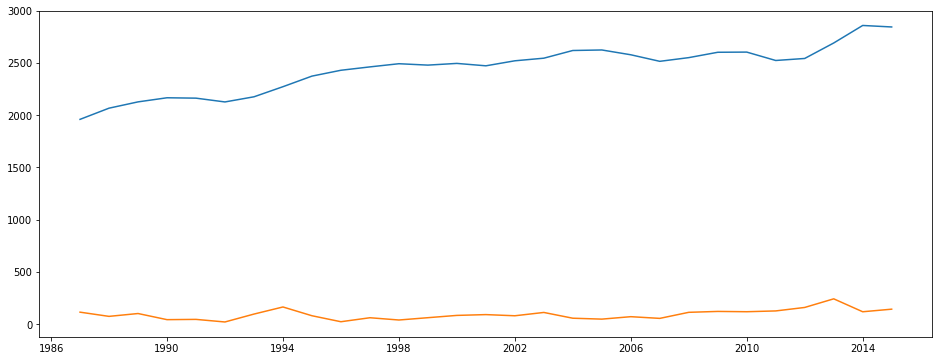

In [61]:
plt.figure(figsize=(16,6))
plt.plot(df_male.rolling(window=3).mean(),label='rolling mean')
plt.plot(df_male.rolling(window=3).std(),label='rolling std')

From the above graph, we see that rolling mean itself has a trend component even though rolling standard deviation is fairly constant with time. For our time series to be stationary, we need to ensure that both the rolling statistics ie: mean & std. dev. remain time invariant or constant with time

In [62]:
df_test = adfuller(df_male.values, autolag='AIC')
dfoutput = pd.Series(df_test[0:4], index = ['Test Statistics', 'p-value','Lag Used','number of observation used'])

In [63]:
for key, value in df_test[4].items():
        dfoutput['Critical value (%s)' %key] = value

print(dfoutput)
    

Test Statistics               -1.287607
p-value                        0.634823
Lag Used                       3.000000
number of observation used    27.000000
Critical value (1%)           -3.699608
Critical value (5%)           -2.976430
Critical value (10%)          -2.627601
dtype: float64


##### For a Time series to be stationary, its ADCF test should have:

p-value to be low (according to the null hypothesis)
The critical values at 1%,5%,10% confidence intervals should be as close as possible to the Test Statistics
From the above ADCF test result, we see that p-value(at max can be 1.0) is very large. Also critical values are no where close to the Test Statistics. Hence, we can safely say that our Time Series at the moment is not stationary

In [64]:
def test_stationarity(timeseries, window = 6):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=window).mean()
    movingSTD= timeseries.rolling(window=window).std()
    
    #PLot Rolling Statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey Fuller Test
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries.values, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistics', 'p-value','Lag Used','number of observation used'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical value (%s)' %key] = value

    print(dfoutput)

##### Data Transformation to achieve Stationarity 

There are a couple of ways to achieve stationarity through data transformation like taking  log10 , loge , square, square root, cube, cube root, exponential decay, time shift and so on ...

In this exercise, lets start of with log transformations. Our objective is to remove the trend component. Hence, flatter curves( ie: paralle to x-axis) for time series and rolling mean after taking log would say that our data transformation did a good job.

LOG SCALE TRANSFORMATION

In [65]:
df_male_logscale = np.log(df_male)

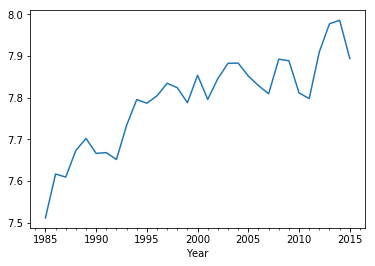

In [66]:
df_male_logscale.plot()

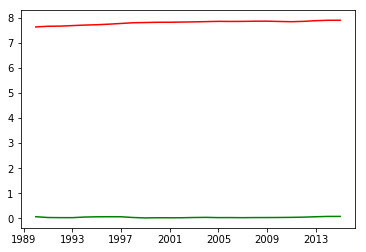

In [67]:
moving_avg = df_male_logscale.rolling(window=6).mean()
moving_std = df_male_logscale.rolling(window=6).std()

#plt.plot(df_male_logscale)
plt.plot(moving_avg, color='red')
plt.plot(moving_std, color='green')

In [68]:
df_male_logscale_minusmovingavg = df_male_logscale - moving_avg
df_male_logscale_minusmovingavg.dropna(inplace = True)

In [69]:
df_male_logscale_minusmovingavg.head()

Year
1990-01-01    0.036353
1991-01-01    0.012129
1992-01-01   -0.010172
1993-01-01    0.050832
1994-01-01    0.092486
Name: male, dtype: float64

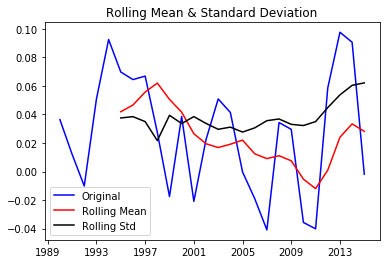

Results of Dickey Fuller Test:
Test Statistics               -3.855489
p-value                        0.002388
Lag Used                       1.000000
number of observation used    24.000000
Critical value (1%)           -3.737709
Critical value (5%)           -2.992216
Critical value (10%)          -2.635747
dtype: float64


In [70]:
test_stationarity(df_male_logscale_minusmovingavg)

EXPONENTIAL DECAY TRANSFORMATION

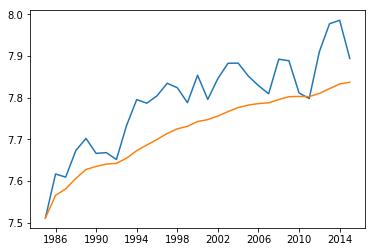

In [71]:
exponentialDecayWeightedAverage = df_male_logscale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(df_male_logscale)
plt.plot(exponentialDecayWeightedAverage)

From above graph, it seems that exponential decay is not holding any advantage over log scale as both the corresponding curves are quite similar in his trend. But, in statistics, inferences cannot be drawn simply by looking at the curves. Hence, we perform the ADCF test again on the decay series below

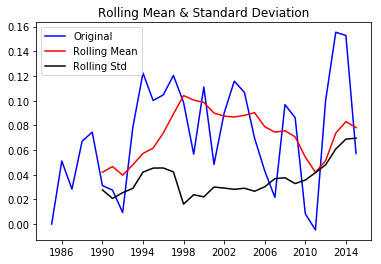

Results of Dickey Fuller Test:
Test Statistics               -4.031005
p-value                        0.001257
Lag Used                       1.000000
number of observation used    29.000000
Critical value (1%)           -3.679060
Critical value (5%)           -2.967882
Critical value (10%)          -2.623158
dtype: float64


In [72]:
df_male_logscale_minusExponentialmovingavg = df_male_logscale - exponentialDecayWeightedAverage
test_stationarity(df_male_logscale_minusExponentialmovingavg)

TIME SHIFT TRANSFORMATION

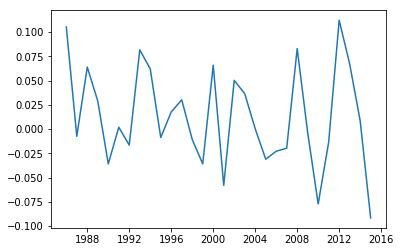

In [73]:
df_male_logscaleDiffShifting = df_male_logscale - df_male_logscale.shift()
plt.plot(df_male_logscaleDiffShifting)

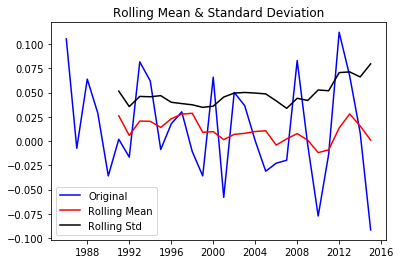

Results of Dickey Fuller Test:
Test Statistics               -5.223198
p-value                        0.000008
Lag Used                       2.000000
number of observation used    27.000000
Critical value (1%)           -3.699608
Critical value (5%)           -2.976430
Critical value (10%)          -2.627601
dtype: float64


In [74]:
df_male_logscaleDiffShifting.dropna(inplace=True)
test_stationarity(df_male_logscaleDiffShifting)

###### We have thus tried out 3 different transformation: log, exp decay & time shift. For simplicity, we will go with the log scale. The reason for doing this is that we can revert back to the original scale during forecasting.

Let us now break down the 3 components of the log scale series using a system libary function. Once, we separate our the components, we can simply ignore trend & seasonality and check on the nature of the residual part.

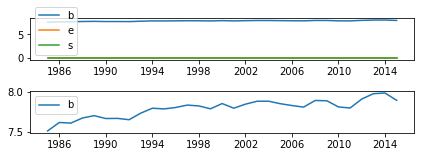

In [75]:
decomposition = seasonal_decompose(df_male_logscale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df_male_logscale, label='Original')
plt.legend('best')

plt.subplot(412)
plt.plot(trend, label='trend')
plt.legend('best')

plt.subplot(411)
plt.plot(seasonal, label='seasonal')
plt.legend('best')

plt.subplot(411)
plt.plot(residual, label='residuals')
plt.legend('best')

plt.tight_layout()

In [76]:
#there can be cases where an observation simply consisted of trend & seasonality. In that case, there won't be 
#any residual component & that would be a null or NaN. Hence, we also remove such cases.

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)

In [77]:
decomposedLogData

Year
1985-01-01    0.0
1986-01-01    0.0
1987-01-01    0.0
1988-01-01    0.0
1989-01-01    0.0
1990-01-01    0.0
1991-01-01    0.0
1992-01-01    0.0
1993-01-01    0.0
1994-01-01    0.0
1995-01-01    0.0
1996-01-01    0.0
1997-01-01    0.0
1998-01-01    0.0
1999-01-01    0.0
2000-01-01    0.0
2001-01-01    0.0
2002-01-01    0.0
2003-01-01    0.0
2004-01-01    0.0
2005-01-01    0.0
2006-01-01    0.0
2007-01-01    0.0
2008-01-01    0.0
2009-01-01    0.0
2010-01-01    0.0
2011-01-01    0.0
2012-01-01    0.0
2013-01-01    0.0
2014-01-01    0.0
2015-01-01    0.0
Name: male, dtype: float64

### ACF Y PACF

How to find value of P & Q for ARIMA ?
A. We need to take help of ACF(Auto Correlation Function) & PACF(Partial Auto Correlation Function) plots. ACF & PACF graphs are used to find value of P & Q for ARIMA. We need to check, for which value in x-axis, graph line drops to 0 in y-axis for 1st time.
From PACF(at y=0), get P
From ACF(at y=0), get Q

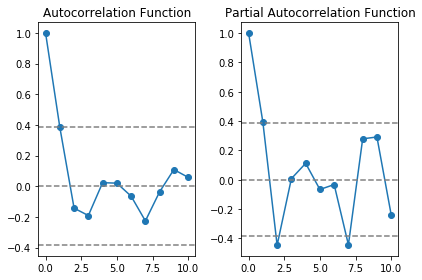

In [78]:
lag_acf = acf(df_male_logscale_minusmovingavg, nlags=10)
lag_pacf = pacf(df_male_logscale_minusmovingavg, nlags=10, method='ols')

plt.subplot(121)
plt.plot(lag_acf,marker='o')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_male_logscale_minusmovingavg)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_male_logscale_minusmovingavg)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf, marker='o')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_male_logscale_minusmovingavg)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_male_logscale_minusmovingavg)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')

plt.tight_layout()

From the ACF graph, we see that curve touches y=0.0 line at x=2. Thus, from theory, Q = 2 From the PACF graph, we see that curve touches y=0.0 line at x=2. Thus, from theory, P = 2


### What is ARIMA model?

ARIMA(Auto Regressive Integrated Moving Average) is a combination of 2 models AR(Auto Regressive) & MA(Moving Average). It has 3 hyperparameters - P(auto regressive lags),d(order of differentiation),Q(moving avg.) which respectively comes from the AR, I & MA components. The AR part is correlation between prev & current time periods. To smooth out the noise, the MA part is used. The I part binds together the AR & MA parts.

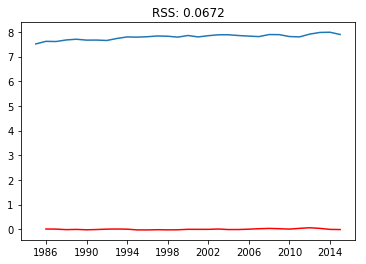

In [79]:
model = ARIMA(df_male_logscale,order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(df_male_logscale)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - df_male_logscaleDiffShifting)**2))
plt.show('plottin ARIMA model')

#### Prediction and Reverse transformations

In [80]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Year
1986-01-01    0.010946
1987-01-01    0.006831
1988-01-01   -0.014543
1989-01-01   -0.005180
1990-01-01   -0.020700
dtype: float64


In [81]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum)

Year
1986-01-01    0.010946
1987-01-01    0.017777
1988-01-01    0.003233
1989-01-01   -0.001946
1990-01-01   -0.022647
1991-01-01   -0.032644
1992-01-01   -0.026854
1993-01-01   -0.016210
1994-01-01   -0.011983
1995-01-01   -0.036561
1996-01-01   -0.062246
1997-01-01   -0.079808
1998-01-01   -0.102894
1999-01-01   -0.122947
2000-01-01   -0.124246
2001-01-01   -0.127279
2002-01-01   -0.129720
2003-01-01   -0.119592
2004-01-01   -0.130358
2005-01-01   -0.140310
2006-01-01   -0.135929
2007-01-01   -0.113437
2008-01-01   -0.077879
2009-01-01   -0.054865
2010-01-01   -0.048067
2011-01-01   -0.010793
2012-01-01    0.051523
2013-01-01    0.087867
2014-01-01    0.083741
2015-01-01    0.072959
dtype: float64


In [82]:
predictions_ARIMA_log = pd.Series(df_male_logscale.iloc[0], index=df_male_logscale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

Year
1985-01-01    7.511525
1986-01-01    7.522470
1987-01-01    7.529301
1988-01-01    7.514758
1989-01-01    7.509578
dtype: float64

With the ARIMA model built, we will now generate predictions. But, before we do any plots for predictions ,we need to reconvert the predictions back to original form. This is because, our model was built on log transformed data

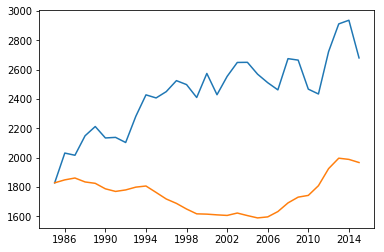

In [83]:
# Inverse of log is exp.
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df_male)
plt.plot(predictions_ARIMA)

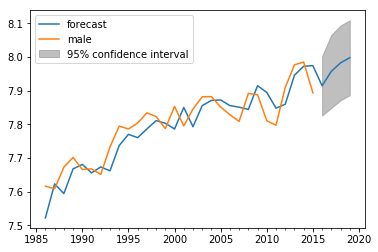

In [84]:
#We have 31 data points. 
#And we want to forecast for additional 3 data points .
results_ARIMA.plot_predict(1,34) 
x=results_ARIMA.forecast(steps=3)

In [85]:
x

(array([7.91480048, 7.95772191, 7.9829795 ]),
 array([0.04508518, 0.05541355, 0.05665911]),
 array([[7.82643514, 8.00316581],
        [7.84911335, 8.06633047],
        [7.87192968, 8.09402931]]))

In [86]:
df_male.tail(5)

Year
2011-01-01    2435
2012-01-01    2724
2013-01-01    2913
2014-01-01    2938
2015-01-01    2681
Name: male, dtype: int64

In [87]:
print(x[0])
print(len(x[0]))
print(np.exp(x[0]))

[7.91480048 7.95772191 7.9829795 ]
3
[2737.5002832  2857.55576039 2930.64992644]


In [88]:
# DataFrame with predictions
result = pd.DataFrame({'female':('NAN','NAN','NAN'),'male':np.exp(x[0])},index=('2016','2017','2018'))
result_df = pd.concat([df_spain_gender, result])
result_df.tail(10)

Gender female         male
2009      763  2666.000000
2010      690  2468.000000
2011      745  2435.000000
2012      815  2724.000000
2013      960  2913.000000
2014      973  2938.000000
2015      923  2681.000000
2016      NAN  2737.500283
2017      NAN  2857.555760
2018      NAN  2930.649926

### CONCLUSION: 

At the end of this work, we have visualized and analyzed the goals related to the Suicide Table and we have predicted the three next years of the male time series. As we can see, the trend increase each year but we have to realize that it is dificult to achieve correctly this target because the stochastic nature of the problem